Epoch 0 | Loss: 0.2696

Epoch 1000 | Loss: 0.1750

Epoch 2000 | Loss: 0.1461

Epoch 3000 | Loss: 0.1368

Epoch 4000 | Loss: 0.1329

Epoch 5000 | Loss: 0.1308

Epoch 6000 | Loss: 0.1296

Epoch 7000 | Loss: 0.1287

Epoch 8000 | Loss: 0.1281

Epoch 9000 | Loss: 0.1277



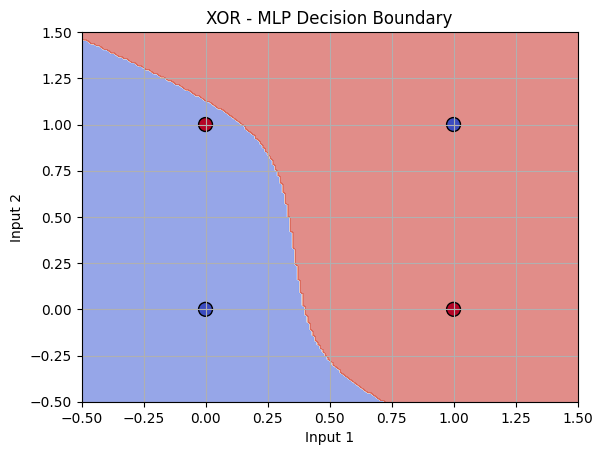

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# XOR input and output
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

Y = np.array([[0], [1], [1], [0]])  # XOR output
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))
np.random.seed(0)
input_size = 2
hidden_size = 2
output_size = 1
lr = 0.1
epochs = 10000

# Weight initialization
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    # Compute loss (MSE)
    loss = np.mean((Y - a2) ** 2)

    # Backpropagation
    d_a2 = (a2 - Y)
    d_z2 = d_a2 * sigmoid_deriv(z2)
    d_W2 = np.dot(a1.T, d_z2)
    d_b2 = np.sum(d_z2, axis=0, keepdims=True)

    d_a1 = np.dot(d_z2, W2.T)
    d_z1 = d_a1 * sigmoid_deriv(z1)
    d_W1 = np.dot(X.T, d_z1)
    d_b1 = np.sum(d_z1, axis=0, keepdims=True)

    # Gradient descent update
    W2 -= lr * d_W2
    b2 -= lr * d_b2
    W1 -= lr * d_W1
    b1 -= lr * d_b1

    if epoch % 1000 == 0:
        print(f"Epoch {epoch} | Loss: {loss:.4f}\n")
def predict(X):
    a1 = sigmoid(np.dot(X, W1) + b1)
    a2 = sigmoid(np.dot(a1, W2) + b2)
    return (a2 > 0.5).astype(int)

# Create a mesh grid
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 200),
                     np.linspace(-0.5, 1.5, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = predict(grid).reshape(xx.shape)

# Plot
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.6)
plt.scatter(X[:, 0], X[:, 1], c=Y.ravel(), edgecolors='k', cmap='coolwarm', s=100)
plt.title("XOR - MLP Decision Boundary")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.grid(True)
plt.show()
